## I. Binary Classification

#### First, importing libraries I will need.

In [1]:
# NumPy and Pandas
import numpy as np
import pandas as pd

# Matplotlib, and remember to display plots in the notebook
from matplotlib import pyplot as plt
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
# Input feature
x = np.linspace(0, 1, 100)

# Noise
np.random.seed(555)
noise = np.random.uniform(-0.2,0.2, 100)

# Target variable
y = ((x + noise) > 0.5).astype(int)
# Reshape x into X
X = x.reshape(100,1)

def fit_and_plot_classifier(clf):
    # Fit model
    clf.fit(X, y)
    
    # Predict and take second value of each prediction
    pred = clf.predict_proba(X)
    pred = [p[1] for p in pred]
    
    # Plot
    plt.scatter(X, y)
    plt.plot(X, pred, 'k--')
    plt.show()
    
    # Return fitted model and predictions
    return clf, pred

## <span style="color:RoyalBlue"> 3.1 - Coding Section Checkpoint</span>

#### A.) First, checking that I've successfully generated the simulated noisy conditional dataset. Plotting its scatterplot.

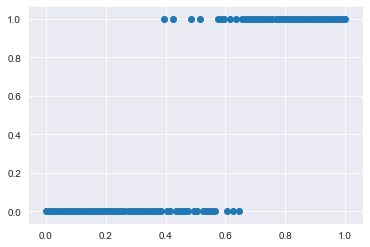

In [3]:
plt.scatter(x, y)
plt.show()

#### B.) Next, confirming that I've reshaped in the input feature $x$ to have 2 "dimensions." Displaying the shape of <code>X</code>.

In [4]:
print(X.shape)

(100, 1)


#### C.) Finally, confirming that I've correctly written a helper function to help me fit and plot classifiers. Fitting and plotting an L1-regularized logistic regression on the noisy conditional dataset with $C = 0.5$.


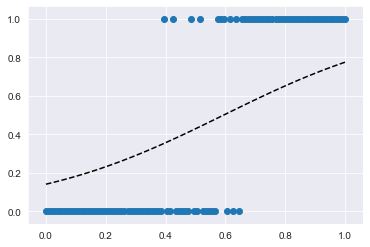

In [5]:
clf, pred = fit_and_plot_classifier(LogisticRegression(C=0.5))

## <span style="color:RoyalBlue"> 3.2 - Random Forest Classifiers</span>


#### A.) First, importing the <code style="color:steelblue">RandomForestClassifier</code> algorithm from <code style="color:steelblue">sklearn.ensemble</code>.

In [6]:
from sklearn.ensemble import RandomForestClassifier

#### B.) Displaying an *instance* of <code>RandomForestClassifier</code> where you do not pass in any arguments / settings (Should be able to see the default arguments for key hyperparameters).

In [7]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
</pre>

#### C.) Fitting and plotting a random forest with its default hyperparameter values and the random state 123.

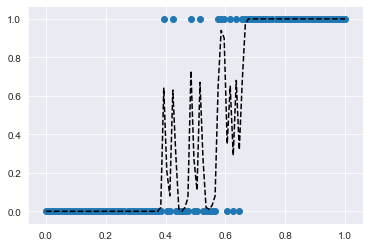

In [8]:
clf, pred = fit_and_plot_classifier(RandomForestClassifier(random_state = 123))

For this simulated dataset, it's plain to see that the default random forest **suffers from overfitting**. That's not surprising because the dataset is incredibly simple, and decision trees may be too complex.

However, it's worth trying to tune the hyperparameters and overall model complexity to see if we can arrive at a better random forest.

#### D.) Trying to tune the number of estimators included in the ensemble. Fitting and plotting random forests with 20, 50, 100, and 200 trees.

Number of Trees: 20


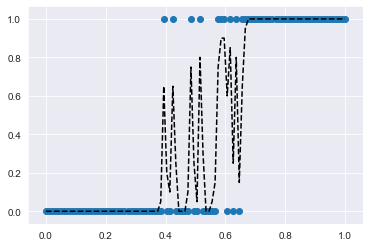

Number of Trees: 50


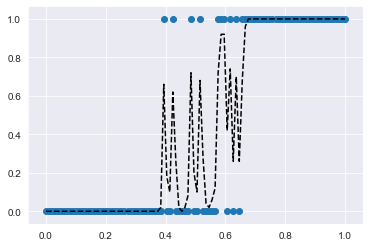

Number of Trees: 100


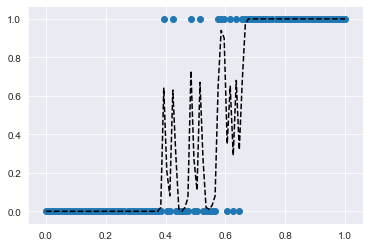

Number of Trees: 200


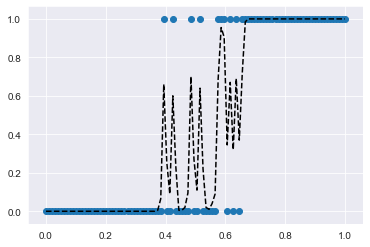

In [9]:
for trees in [20, 50, 100, 200]: 
    print('Number of Trees:', trees)
    fit_and_plot_classifier(RandomForestClassifier(random_state=123, n_estimators=trees))

    

#### E.) Next, fitting and plotting random forests that set a higher minimum leaf size. Trying minimum leaf sizes of 2, 5, 10, and 20.

Minimum Leaf Size: 2


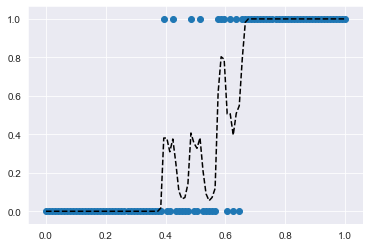

Minimum Leaf Size: 5


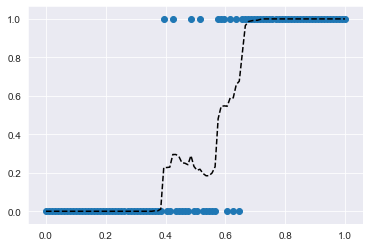

Minimum Leaf Size: 10


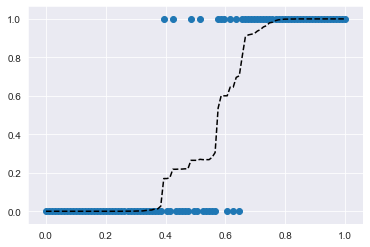

Minimum Leaf Size: 20


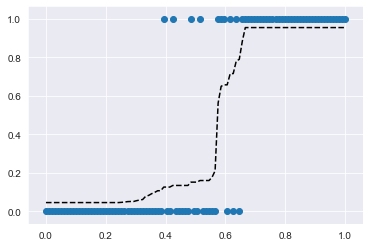

In [10]:
for leaf in [2, 5, 10, 20]: 
    print('Minimum Leaf Size:', leaf) 
    fit_and_plot_classifier(RandomForestClassifier(random_state=123, min_samples_leaf = leaf))

## <span style="color:RoyalBlue"> 3.3 - Gradient Boosted Classifiers</span>

#### A.) First, importing the <code style="color:steelblue">GradientBoostingClassifier</code> algorithm from <code style="color:steelblue">sklearn.ensemble</code>.

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

#### B.) Next, displaying an *instance* of <code>GradientBoostingClassifier</code> where you do not pass in any arguments / settings (Should be able to see the default arguments for key hyperparameters).

In [13]:
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### C.) Fitting and plotting a gradient boosted tree with its default hyperparameter values and the random state 123.

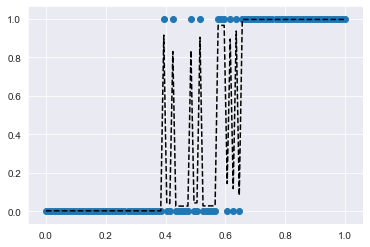

In [14]:
clf, pred = fit_and_plot_classifier(GradientBoostingClassifier(random_state=123))

#### D.) Tuning the number of estimators included in the ensemble. Fitting and plotting boosted classifiers with 10, 20, 50, and 200 trees.

Number of Trees: 10


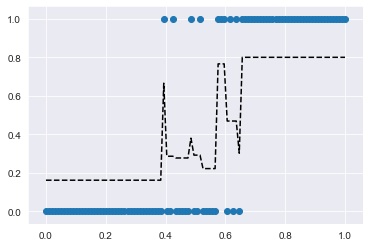

Number of Trees: 20


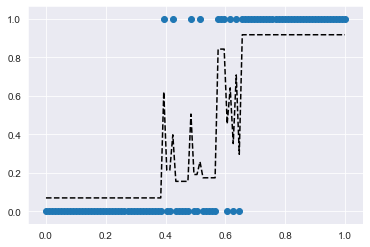

Number of Trees: 50


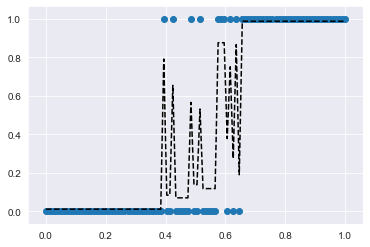

Number of Trees: 200


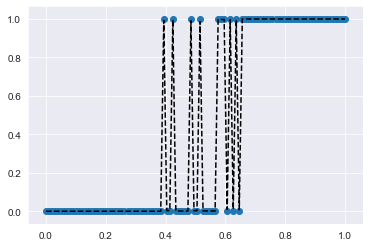

In [15]:
for trees in [10, 20, 50, 200]: 
    print('Number of Trees:', trees) 
    fit_and_plot_classifier(GradientBoostingClassifier(random_state=123, n_estimators=trees))

#### E.) Next, fitting and plotting boosted trees with different max depth values. Try max depth values of 1, 2, 5, and 10.

Max Depth: 1


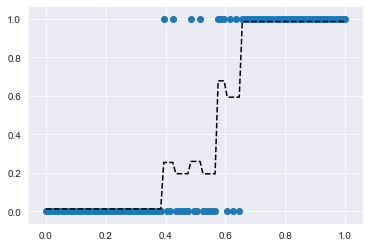

Max Depth: 2


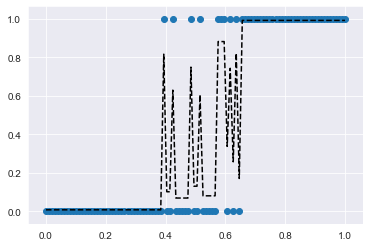

Max Depth: 5


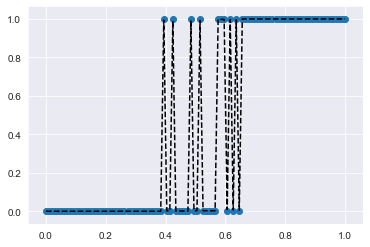

Max Depth: 10


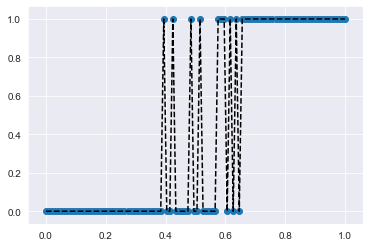

In [16]:
for depth in [1, 2, 5, 10]: 
    print('Max Depth:', depth)
    fit_and_plot_classifier(GradientBoostingClassifier(random_state=123, max_depth=depth))